# Model to Physical Properties

When constructing a forward problem, it is important to keep the inversion process in mind. In particular, the set of parameters one inverts for may be decoupled from the physical properties as described on the mesh. For example, one often inverts for log conductivity when working with electrical methods, so the exponential needs to be taken to get the value of electrical conductivity on the mesh. In [SimPEG](http://simpeg.xyz), this is achieved through mappings. 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from SimPEG import Mesh, Maps

%matplotlib inline

## Define a Simulation Mesh

Here, we will work with a 20 x 20 cell 2D mesh.

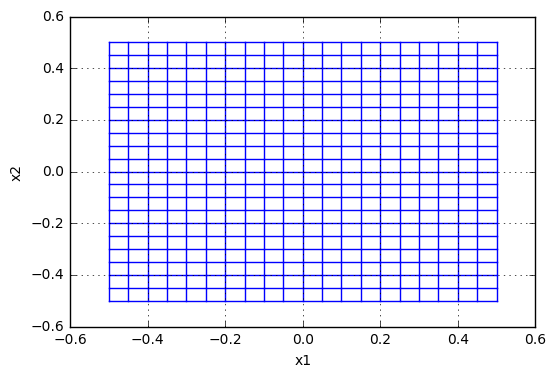

In [4]:
mesh = Mesh.TensorMesh([20, 20], x0='CC')
mesh.plotGrid()

## 1:1 Maps

A simple example is wanting to invert for $\mathbf{m} = \log \boldsymbol{\sigma}$. In this case

$$
\sigma = \mathcal{M}(\mathbf{m}) = \exp(\mathbf{m})
$$

In [6]:
log_sigma_background = 0.
log_sigma_layer = np.log(3)

layer_y = np.r_[-0.1, 0.1]

m = log_sigma_background * np.ones(mesh.nC)
m[(mesh.gridCC[:,1] > layer_y[0]) & (mesh.gridCC[:,1] < layer_y[1])] = log_sigma_layer

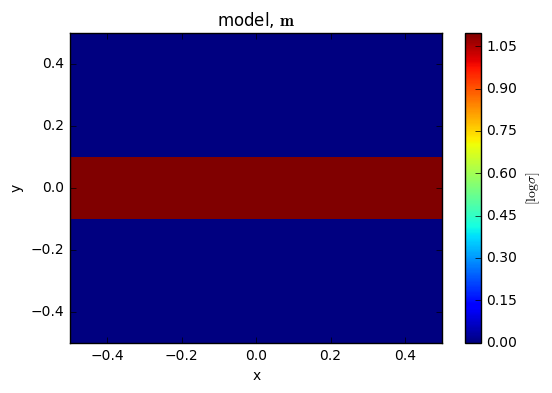

In [12]:
fig, ax = plt.subplots(1,1)

f = mesh.plotImage(m, ax=ax)
plt.colorbar(f[0], ax=ax, label='$\log{\sigma}$')
ax.set_title('model, $\mathbf{m}$')

To convert to electrical consuctivity, $\sigma$, we use an ExpMap which takes the exponential

In [24]:
Maps.ExpMap?

Init signature: Maps.ExpMap(self, mesh=None, nP=None, **kwargs)
Docstring:     
Electrical conductivity varies over many orders of magnitude, so it is
a common technique when solving the inverse problem to parameterize and
optimize in terms of log conductivity. This makes sense not only
because it ensures all conductivities will be positive, but because
this is fundamentally the space where conductivity
lives (i.e. it varies logarithmically).

Changes the model into the physical property.

A common example of this is to invert for electrical conductivity
in log space. In this case, your model will be log(sigma) and to
get back to sigma, you can take the exponential:

.. math::

    m = \log{\sigma}

    \exp{m} = \exp{\log{\sigma}} = \sigma
File:           ~/git/python_symlinks/SimPEG/Maps.py
Type:           type


In [26]:
expMap = Maps.ExpMap(mesh)
sigma = expMap * m

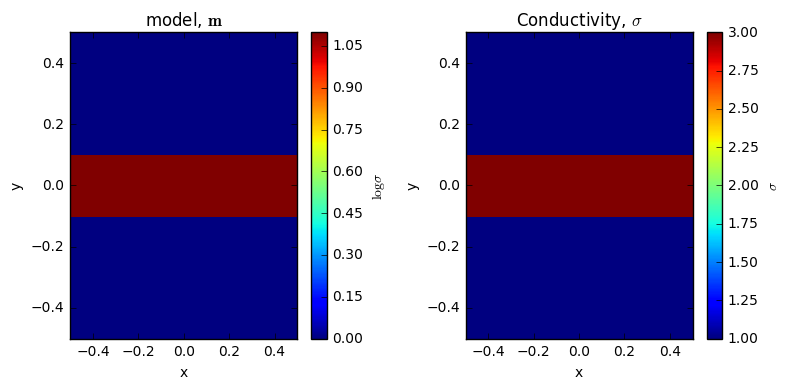

In [29]:
fig, ax = plt.subplots(1,2, figsize=(8,4))

f = mesh.plotImage(m, ax=ax[0])
plt.colorbar(f[0], ax=ax[0], label='$\log{\sigma}$')
ax[0].set_title('model, $\mathbf{m}$')

f = mesh.plotImage(sigma, ax=ax[1])
plt.colorbar(f[0], ax=ax[1], label='$\sigma$')
ax[1].set_title('Conductivity, $\sigma$')

plt.tight_layout()